In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
dataset = pd.read_csv('dataset.csv')


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [43]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


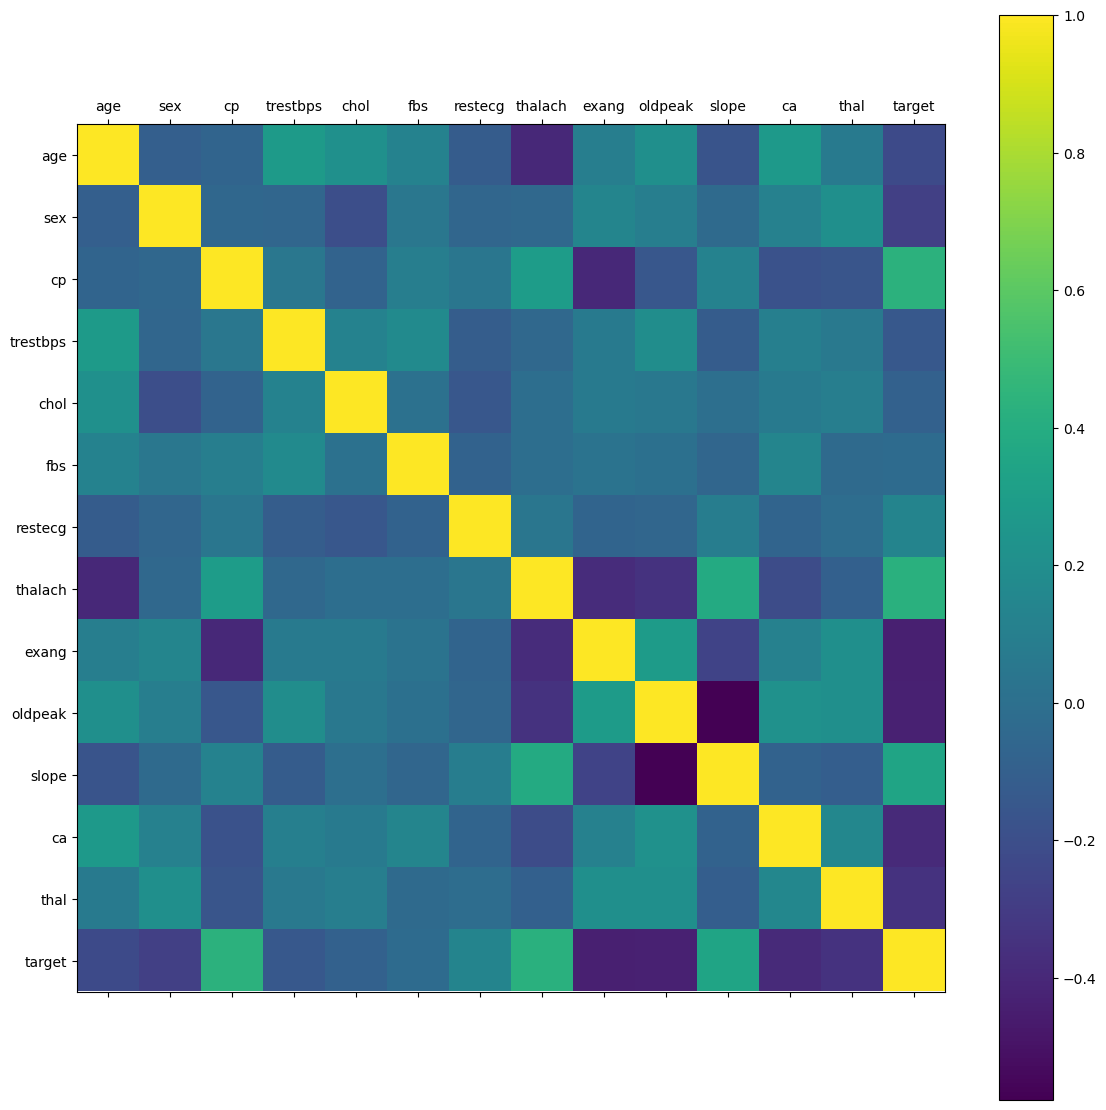

In [44]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

In [45]:

dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [46]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

K Neighbors Classifier

In [51]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))


In [52]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

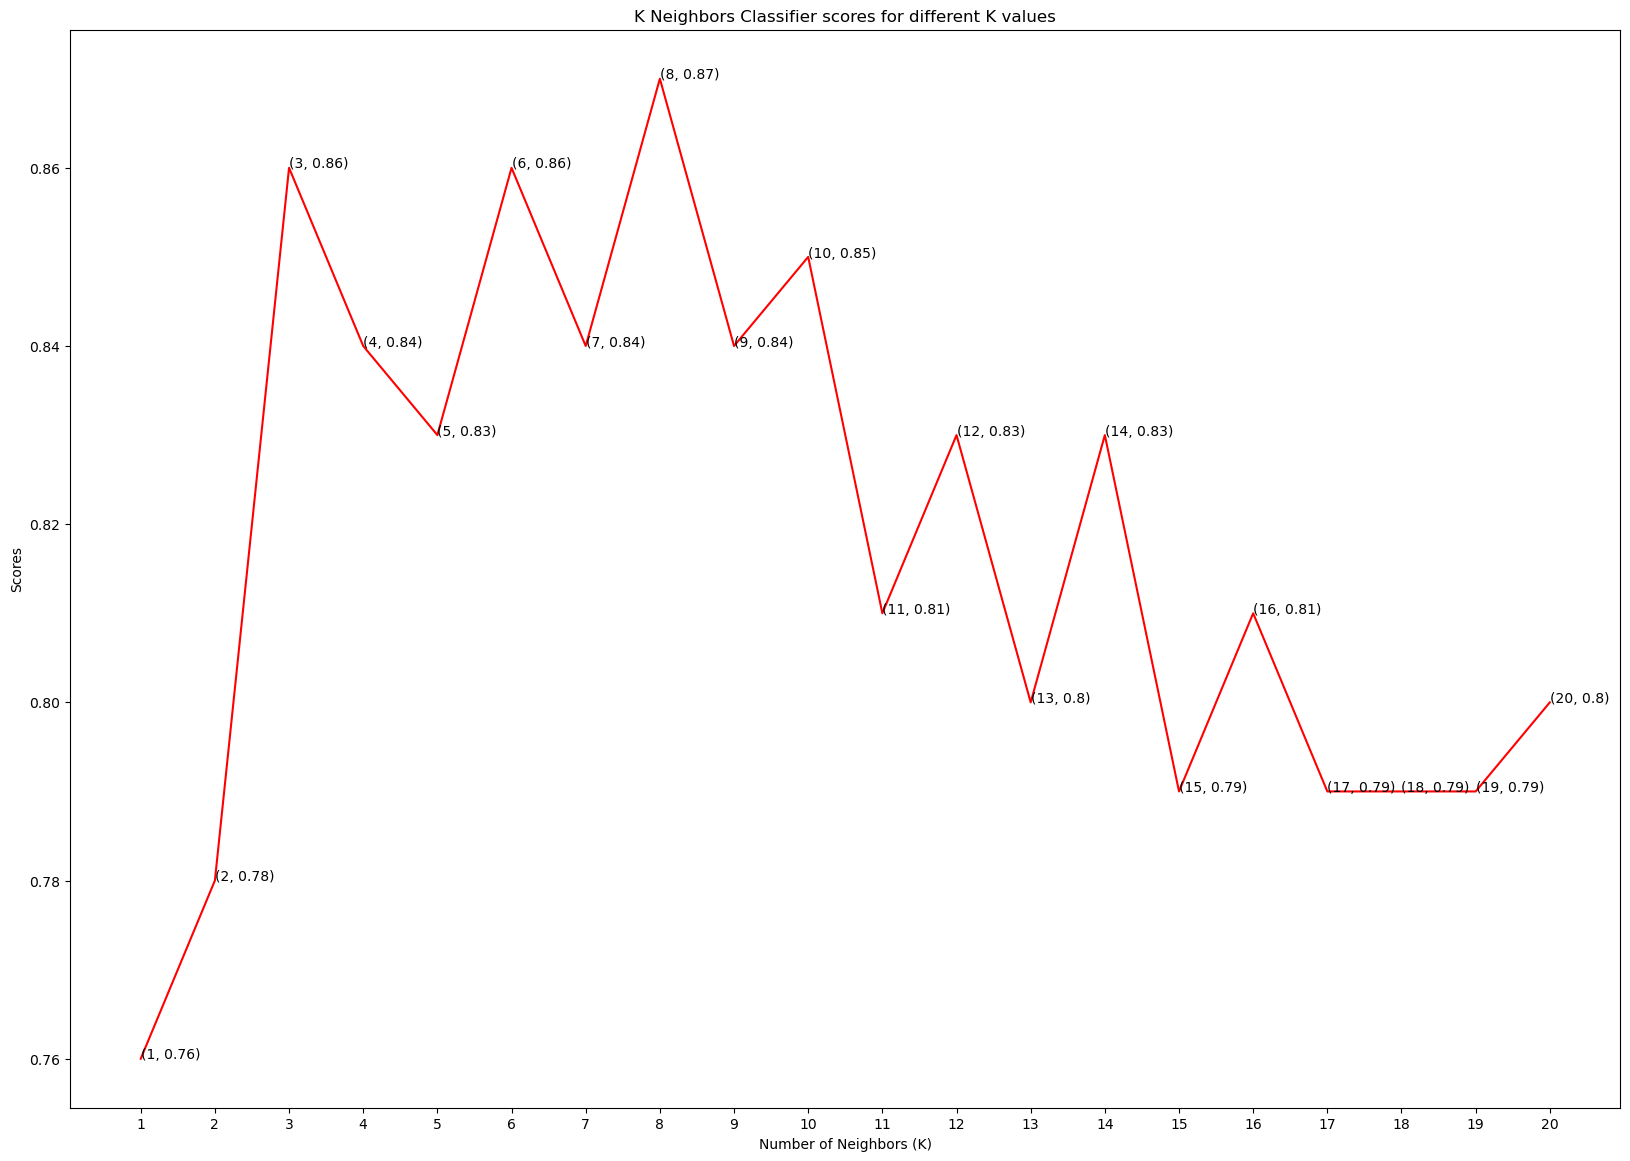

In [49]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [50]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))


The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


In [ ]:
Y_test = np.array(y_test)

#X_test.append(newPred);
X1_test = np.array(X_test)
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)
y_pred_knn = knn_classifier.predict(X_test)
#y_pred_knn[0]
X_train

predictionKNN = knn_classifier.predict(X1_test)

for i in range(len(X1_test)):
    print("{} - {}\n".format(X1_test[i],predictionKNN[i]))
    




In [ ]:

cm = confusion_matrix(y_test, predictionKNN)

TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  
TP = cm[1, 1]  


TPR = TP / (TP + FN)


FPR = FP / (FP + TN)


TNR = TN / (TN + FP)


Precision = TP / (TP + FP)


prevalence = (TP + FN) / (TP + FP + TN + FN)


print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", Precision)
print("Prevalence:", prevalence)

In [ ]:
from sklearn.metrics import f1_score





f1score = f1_score(y_test,predictionKNN )


print("F1 Score:", f1score)

Below we are going to predict using Knn classifier for the value [ 1.72421839 ,0.76395577, -1.39653716, -1.07781984,  1.34614673  ,0.,
  1.,          1. ,         0. ,         0. ,         0. ,        1.,
  0.,          0. ,         1. ,         0.,          0.,          1.,
  1.,          0.,          0.,          1.,          0.,          0.,
  0.,          0.,       0.,          0.,          0.,          1.        ], Which is classified as 0.

In [ ]:
# Predicting a new TestCase using KNN Classifier

newPred = [[1.72421839 ,0.76395577, -1.39653716, -1.07781984,  1.34614673  ,0.,
  1.,          1. ,         0. ,         0. ,         0. ,        1.,
  0.,          0. ,         1. ,         0.,          0.,          1.,
  1.,          0.,          0.,          1.,          0.,          0.,
  0.,          0.,       0.,          0.,          0.,          1.  ]]

newClass = knn_classifier.predict(newPred);
print("New Class: ",newClass)









Support Vector Classifier

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))
predictionSVC = svc_classifier.predict(X1_test)


for i in range(len(X_test)):
    print("{} - {}\n".format(X1_test[i],predictionSVC[i]))
newClass = svc_classifier.predict(newPred)
print(newClass)

In [ ]:


cm = confusion_matrix(y_test, predictionSVC)

# Extract the values from the confusion matrix
TN = cm[0, 0]  # True negatives
FP = cm[0, 1]  # False positives
FN = cm[1, 0]  # False negatives
TP = cm[1, 1]  # True positives


TPR = TP / (TP + FN)


FPR = FP / (FP + TN)

TNR = TN / (TN + FP)


Precision = TP / (TP + FP)


prevalence = (TP + FN) / (TP + FP + TN + FN)


print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", Precision)
print("Prevalence:", prevalence)

In [ ]:
f1score = f1_score(y_test,predictionSVC )


print("F1 Score:", f1score)

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

predictionDT = dt_classifier.predict(X_test)

for i in range(len(X1_test)):
    print("{} - {}\n".format(X1_test[i],predictionDT[i]))
newClass = dt_classifier.predict(newPred)
print("{} - {}\n".format(newPred,newClass));

In [ ]:
cm = confusion_matrix(y_test, predictionDT)

# Extract the values from the confusion matrix
TN = cm[0, 0]  1, 0]  

TP = cm[1, 1]  


TPR = TP / (TP + FN)

tive Rate (FPR)
FPR = FP / (FP + TN)


TNR = TN / (TN + FP)

Precision = TP / (TP + FP)


prevalence = (TP + FN) / (TP + FP + TN + FN)

# Print the calculated metrics
print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", Precision)
print("Prevalence:", prevalence)



In [ ]:
f1score = f1_score(y_test,predictionDT )


print("F1 Score:", f1score)

The Decision Tree algorithm classified the new attribute as 1.

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

Random Forest Classifier

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))
predictionRF = rf_classifier.predict(X_test)

for i in range(len(X1_test)):
    print("{} - {}\n".format(X1_test[i],predictionRF[i]))
newClass = rf_classifier.predict(newPred)
print("{} - {}\n".format(newPred,newClass));


In [37]:
cm = confusion_matrix(y_test, predictionRF)

# Extract the values from the confusion matrix
TN = cm[0, 0]  
FP = cm[0, 1]  

FN = cm[1, 0]  

TP = cm[1, 1]  


TPR = TP / (TP + FN)


FPR = FP / (FP + TN)


TNR = TN / (TN + FP)


Precision = TP / (TP + FP)


prevalence = (TP + FN) / (TP + FP + TN + FN)

# Print the calculated metrics
print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", Precision)
print("Prevalence:", prevalence)

True Positive Rate (TPR): 0.8653846153846154
False Positive Rate (FPR): 0.20833333333333334
True Negative Rate (TNR): 0.7916666666666666
Precision: 0.8181818181818182
Prevalence: 0.52


In [ ]:
f1score = f1_score(y_test,predictionRF )


print("F1 Score:", f1score)

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

In this project, I used K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier. I varied parameters across each model to improve their scores. In the end, K Neighbors Classifier achieved the highest score of 87% with 8 nearest neighbors